In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')



In [3]:
## To inspect the complete list of columns and rows.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
# Importing the the data

df = pd.read_csv(r"C:\Users\amikumak\Desktop\Lead Scoring Assignment\Leads.csv")


## 1. Inspecting the Data

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
## Reviewing data information.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
## Analyzing the statistical information.

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2.Data Cleaning and Preparation.

In [8]:
## Cheking duplicates in the data.

df.duplicated().sum()

0

There are no duplicate values in the data

In [9]:
## Since both 'Prospect ID' and 'Lead Number' columns contain unique values without any duplicates, they serve as unique identifiers for each piece of data. 
## As a result, removing them will not have a significant impact on our model. Therefore, we can safely drop these columns.

df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [10]:
## Checking the columns with 'Select'values in it.

for i in df.columns:
    if (df[i] == 'Select').any():
        print(i)


Specialization
How did you hear about X Education
Lead Profile
City


In [11]:
## Converting 'Select' values to null as they are considered equivalent to null values.

columns_to_replace = ['How did you hear about X Education', 'Specialization', 'Lead Profile', 'City']

for column in columns_to_replace:
    df[column] = df[column].replace('Select', np.nan)


In [12]:
## Listing the percentage of null values in each column.

null_above_30 = df.columns[(df.isnull().mean() * 100) > 30]
null_above_30


Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [13]:
## Dropping 'Specialization' column from the list of null columns to impute later as this seems like a significant column.
null_above_30=null_above_30.drop('Specialization')
null_above_30


Index(['How did you hear about X Education', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [14]:
## Dropping columns with more than 30% null values.

for col in df[null_above_30]:
    df.drop(col, axis=1, inplace=True)


In [15]:
## Checking the percentage of null values in each column after dropping columns with more than 30% null values.

df.isnull().mean() * 100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

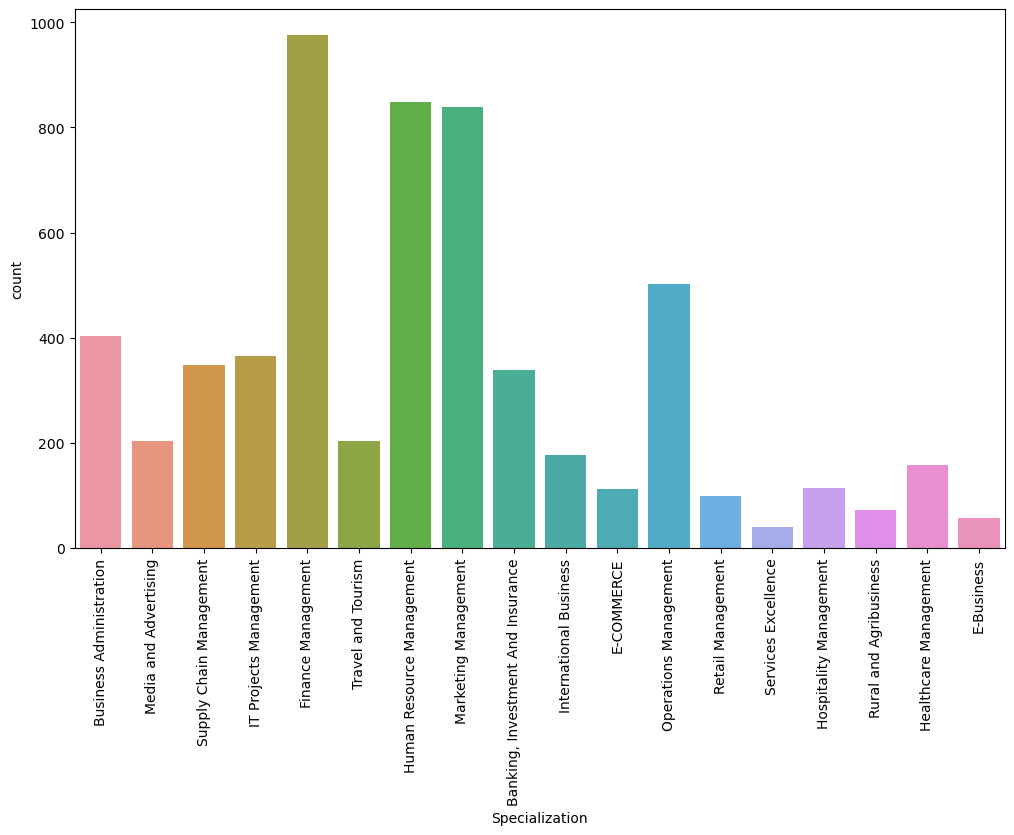

In [16]:
## Checking the distribution of values in the 'Specialization' column.

plt.figure(figsize=(12,7))
sns.countplot(x='Specialization', data=df)
plt.xticks(rotation=90)
plt.show()


In [17]:
## Imputing the missing values in 'Specialization' column with 'Not Specified' as we don't know what the specialization is.

df.Specialization.fillna('Not Specified', inplace=True)

In [18]:
## Imputing the values with mode.

df.Country.fillna(df['Country'].mode()[0], inplace=True)

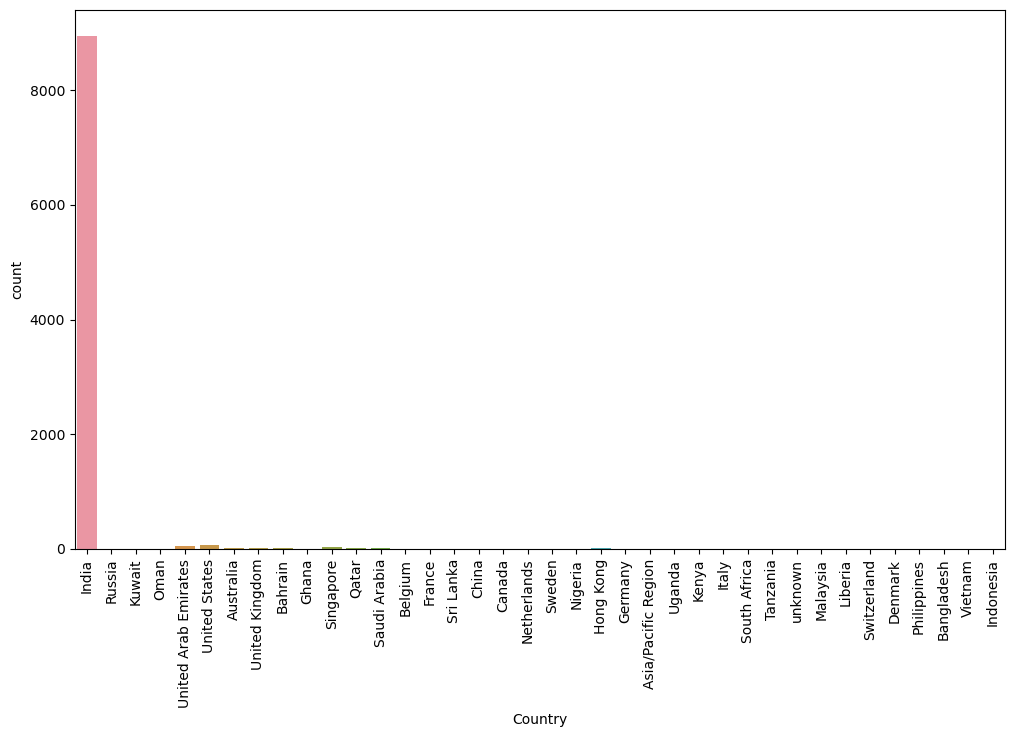

In [19]:
## Checking the distribution of values in the 'Country' column.


plt.figure(figsize=(12,7))
sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)
plt.show()


In [20]:
## The distribution in the 'Country' column can make our analysis skewed as the highest number of user are from 'India' so we can drop the column.

df.drop('Country', axis=1, inplace=True)

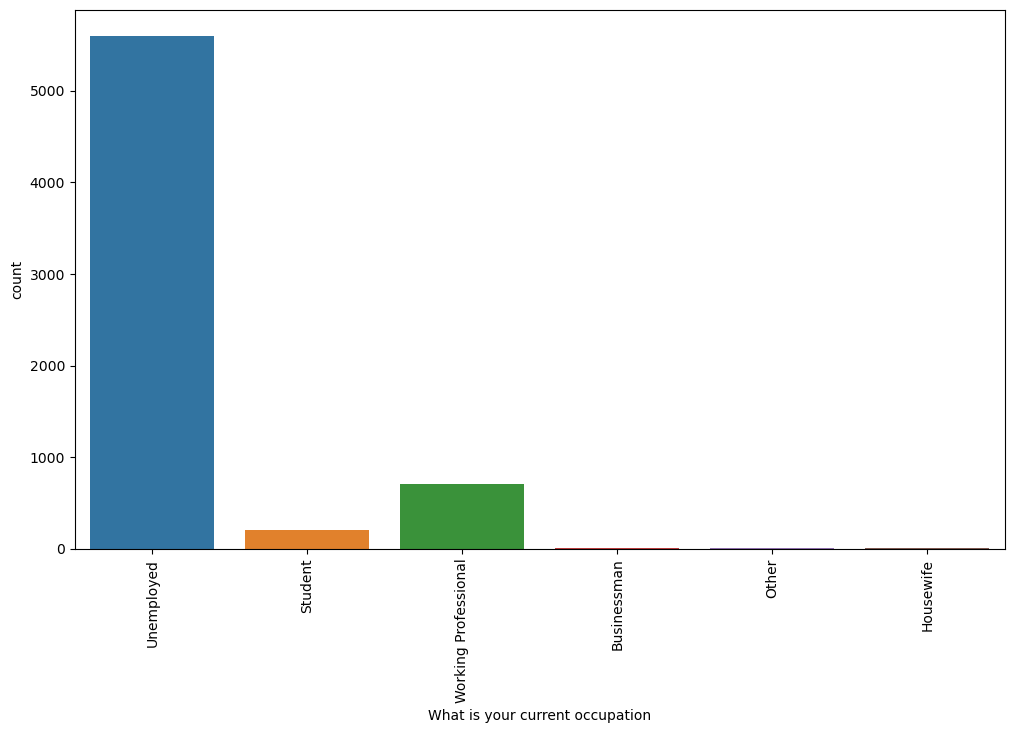

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(x='What is your current occupation', data=df)
plt.xticks(rotation=90)
plt.show()

In [22]:
## Imputing the values with by creating a new category as we don't know the occupation of the user.

df['What is your current occupation'].fillna('Other', inplace= True)


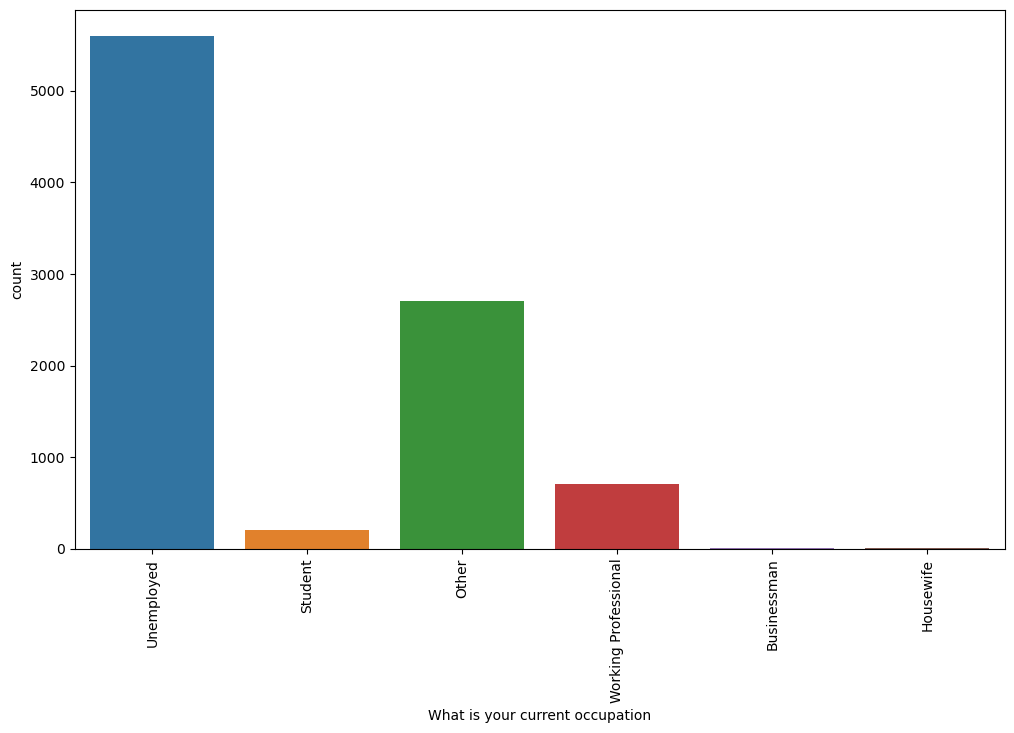

In [23]:
## Checking the distribution of values in the 'What is your current occupation' column after imputation.

plt.figure(figsize=(12,7))
sns.countplot(x='What is your current occupation', data=df)
plt.xticks(rotation=90)
plt.show()


In [24]:
## Checking the distribution of values in the 'What matters most to you in choosing a course' column.

df['What matters most to you in choosing a course'].value_counts()


What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [25]:
## Imputing the values with mode.

df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0], inplace=True)

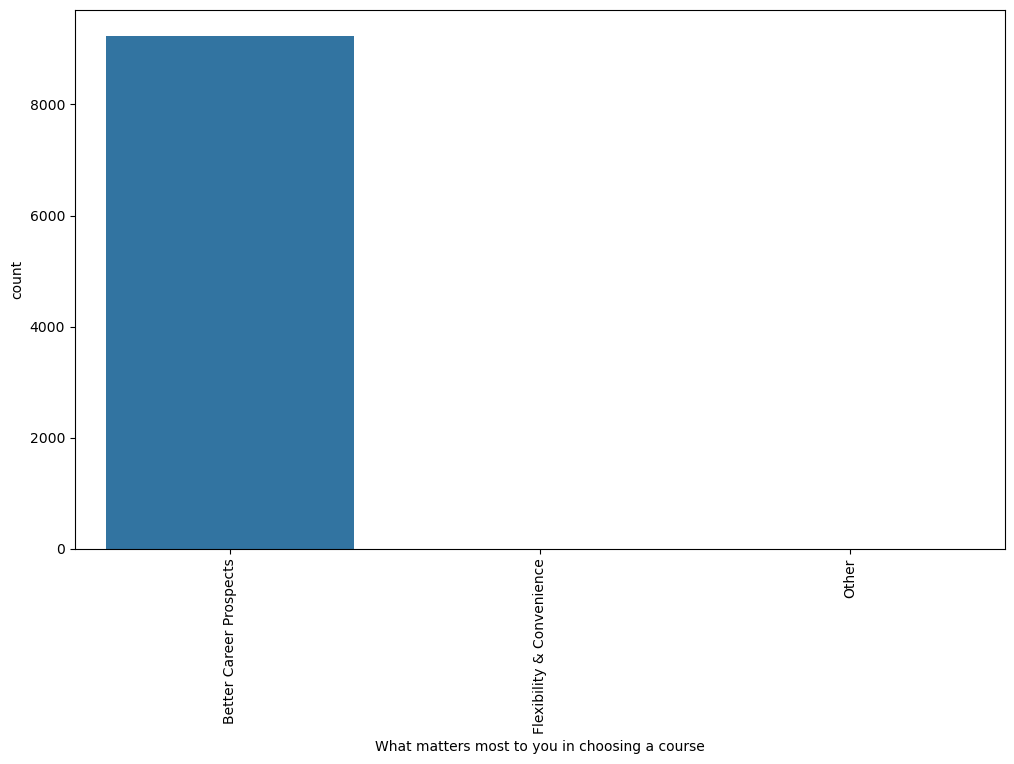

In [26]:
## Checking the distribution of values in the 'What matters most to you in choosing a course' column after imputation.

plt.figure(figsize=(12,7))
sns.countplot(x='What matters most to you in choosing a course', data=df)
plt.xticks(rotation=90)
plt.show()


In [27]:
## Checking the distribution of values in the 'TotalVisits' column.

df['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [28]:
## Imputing the missing values in 'TotalVisits' and 'Page Views Per Visit' column with median.

df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)

df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)

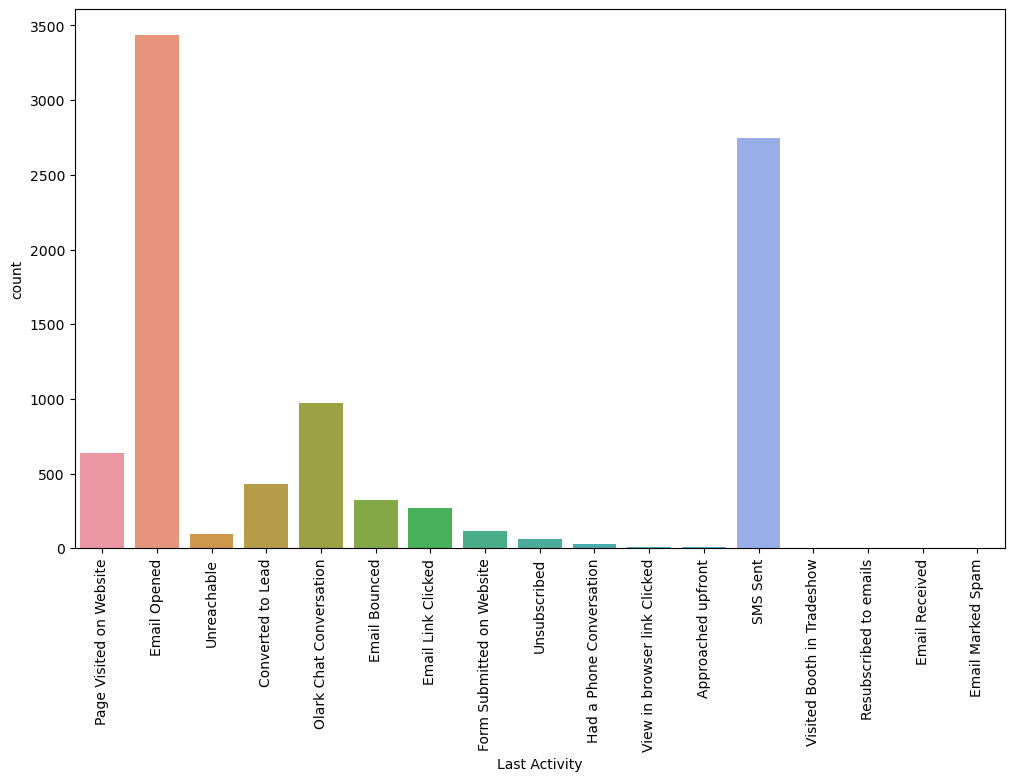

In [29]:
## Checking the distribution of values in the 'Last Activity' column.

plt.figure(figsize=(12,7))
sns.countplot(x='Last Activity', data=df)
plt.xticks(rotation=90)
plt.show()

In [30]:
## Imputing the missing values in 'Last Activity' column with mode.

df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace=True)

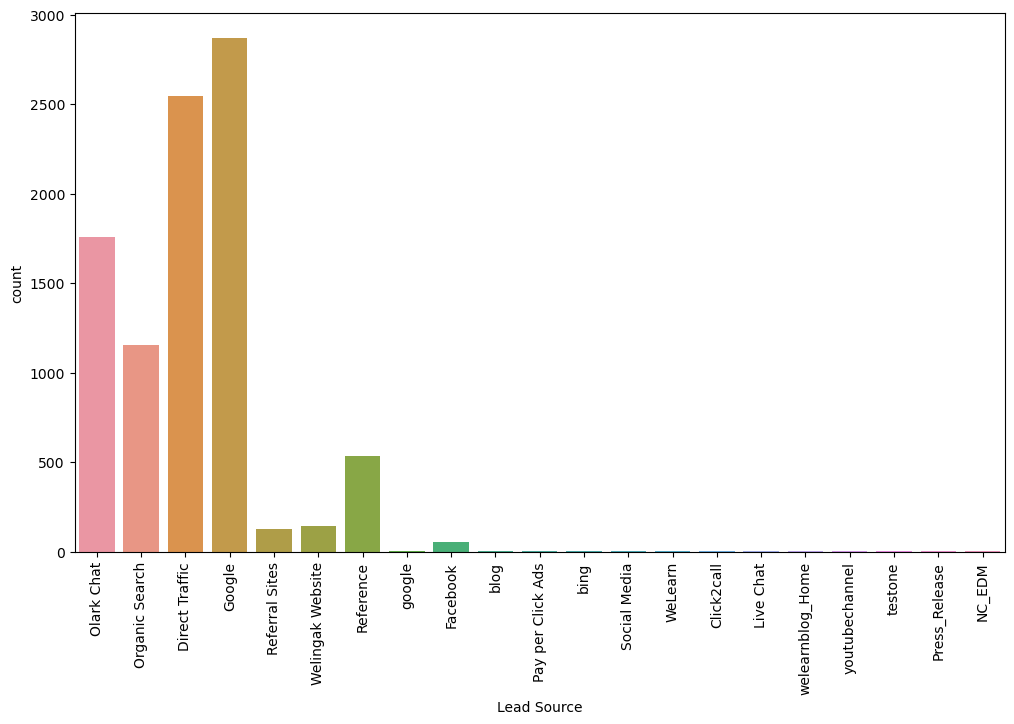

In [31]:
## Checking the distribution of values in the 'Lead Source' column.

plt.figure(figsize=(12,7))
sns.countplot(x='Lead Source', data=df)
plt.xticks(rotation=90)
plt.show()



In [32]:
## The above distribution shows that there are 2 values 'google' and 'Google' which is a common lead source, so we can impute it with 'Google'.

df['Lead Source'].replace('google', 'Google', inplace=True)

In [33]:
## Imputing the missing values in 'Lead Source' column with mode.

df['Lead Source'].fillna(df['Lead Source'].mode()[0], inplace=True)

In [34]:
## Checking the percentage of null values in each column again after imputing the missing values.

df.isnull().mean() * 100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

We can see that all the null values have been imputed.

In [35]:
## Checking the data implance.

for i in df.columns:
    print( df[i].value_counts())

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
Converted
0    5679
1    3561
Name: count, dtype: int64
TotalVisits
0.0      2189
2.0      1680
3.0      1443
4.0      

Several columns demonstrate highly imbalanced or skewed data, which are unlikely to significantly contribute to the analysis. Hence, it's better to remove these columns.

In [36]:
## Dropping columns with imbalanced data.

df.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine',
         'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
         'Get updates on DM Content','I agree to pay the amount through cheque', ],axis=1,inplace=True)

In [37]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,Modified


In [38]:
## We will remove the 'Last Notable Activity' column because it duplicates information already present in the 'Last Activity' column. 
## Additionally, as it is generated by the sales team, it is redundant for our analysis and does not contribute significantly to our insights.

df.drop(['Last Notable Activity'],axis=1,inplace=True)

In [39]:
## Checking the data before staring EDA.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

## 3. EDA(Exploratory Data Analysis)

### Univariate Analysis

- Examining Categorical Variables

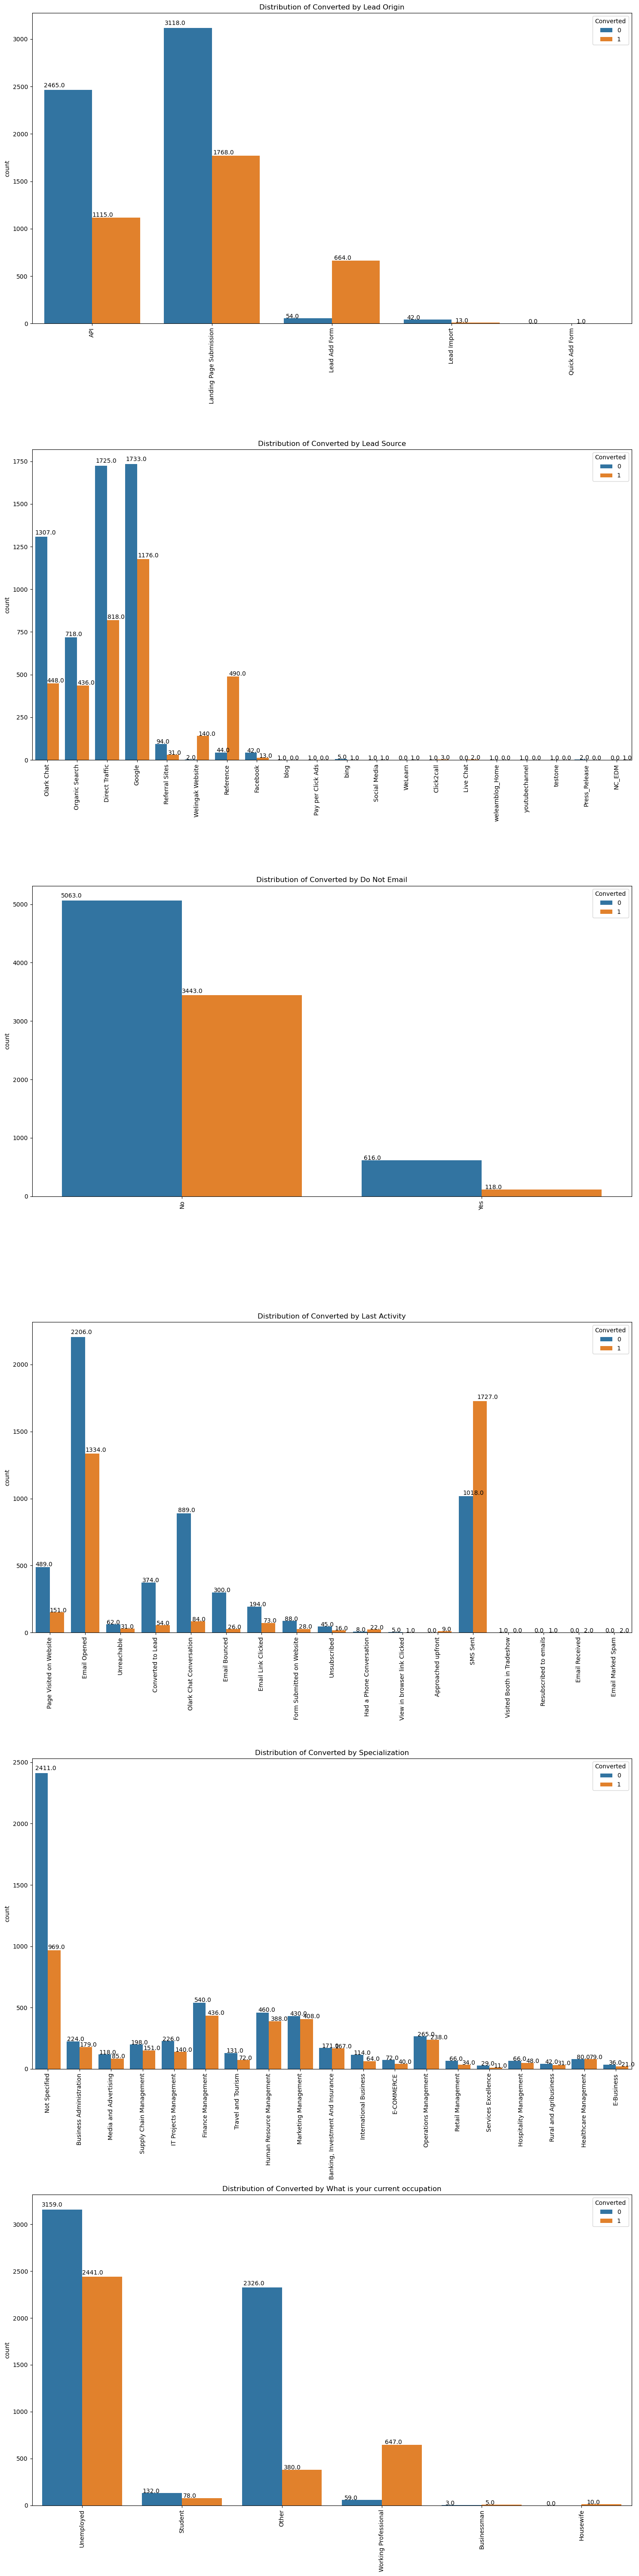

In [40]:
# Define the categorical columns to plot
categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation']

# Create a figure and axes objects with subplots
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(15, 10 * len(categorical_columns)))

# Iterate over the categorical columns and plot count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, hue='Converted', ax=axes[i]).set_title(f'Distribution of Converted by {column}')
    axes[i].tick_params(axis='x', rotation=90)
    for p in axes[i].patches:
        axes[i].annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    axes[i].set(xlabel=None)
    

plt.tight_layout()
plt.show()


## Observations



Analysis of the plot reveals the following insights:

1. The conversion rate for 'API' stands at approximately 31%, while for 'Landing Page Submission', it is around 36%. Additionally, 'Lead Add Form' shows a higher number of conversions compared to unsuccessful ones, and 'Lead Import' has a lower count.

2. To enhance the overall lead conversion rate, the focus should be on improving the conversion of leads originating from API and Landing Page Submission sources. Additionally, efforts should be made to generate more leads from the Lead Add Form.

3. The plot indicates that Google and Direct traffic generate the maximum number of leads. Moreover, the conversion rate for 'Reference' and 'Welingak Website' leads is high. To improve the overall lead conversion rate, emphasis should be placed on improving lead conversion from Olark Chat, organic search, direct traffic, and Google leads, while also increasing leads from reference and Welingak website.

4. The plot further highlights that people who opt for the mail option are becoming more leads.

5. Analysis of the plot reveals that the conversion rate for the last activity of 'SMS Sent' is approximately 63%, with 'Email Opened' being the highest last activity among leads.

6. Among different occupations, 'Unemployed' leads generate a higher number of leads and have a conversion rate of approximately 45%, while the conversion rate is higher for 'Working Professionals'.

7. The count plot of 'Specialization' shows that 'Management' specialization generates the highest number of leads overall, with the 'Other' category also contributing significantly to lead generation.

### Outlier Treatment and Analysis

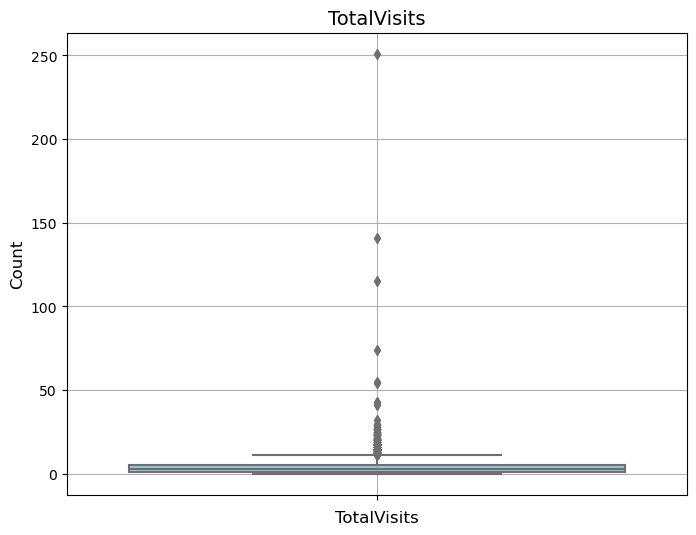

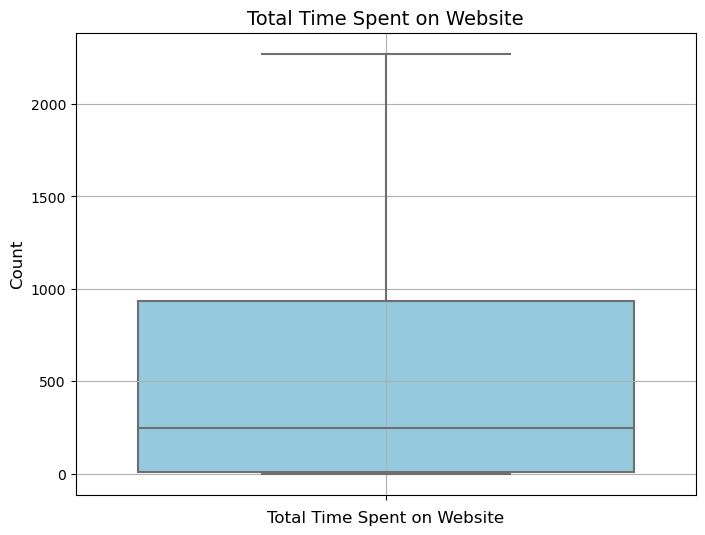

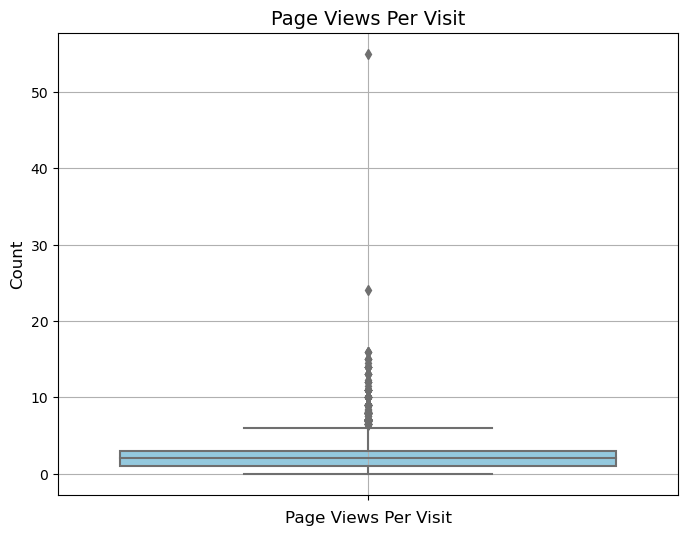

In [41]:
## Checking the distribution of values in the 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' columns.

numerical_columns = df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=column, data=df, color='skyblue')  
    plt.title(f'{column}', fontsize=14)  
    plt.xlabel(column, fontsize=12)  
    plt.ylabel('Count', fontsize=12)  
    plt.xticks(rotation=45) 
    plt.grid(True)  


Based on the plots above, it's evident that outliers exist in the variables 'TotalVisits' and 'Page Views Per Visit'. Notably, these outliers predominantly occur in the upper range of the data distribution. Therefore, the focus should be on treating these upper-range outliers.

In [42]:
## Removing outliers.

outlier_page_views = df['Page Views Per Visit'].quantile(0.99)
outlier_total_visits = df['TotalVisits'].quantile(0.99)

df = df[(df['Page Views Per Visit'] <= outlier_page_views) & (df['TotalVisits'] <= outlier_total_visits)]


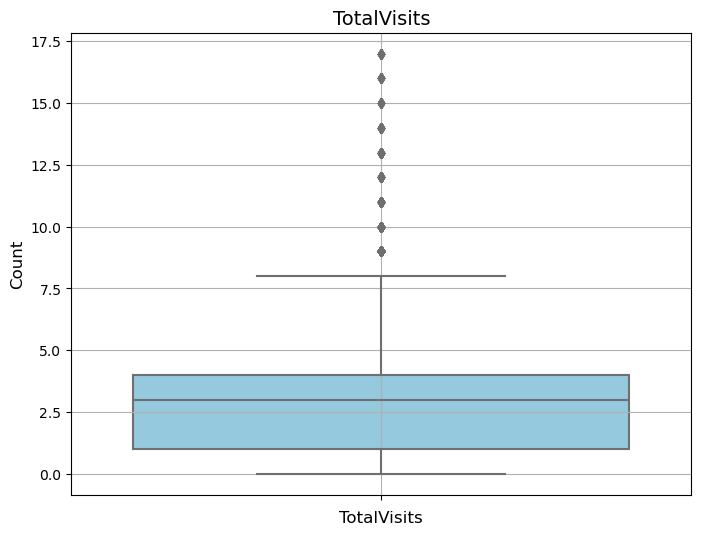

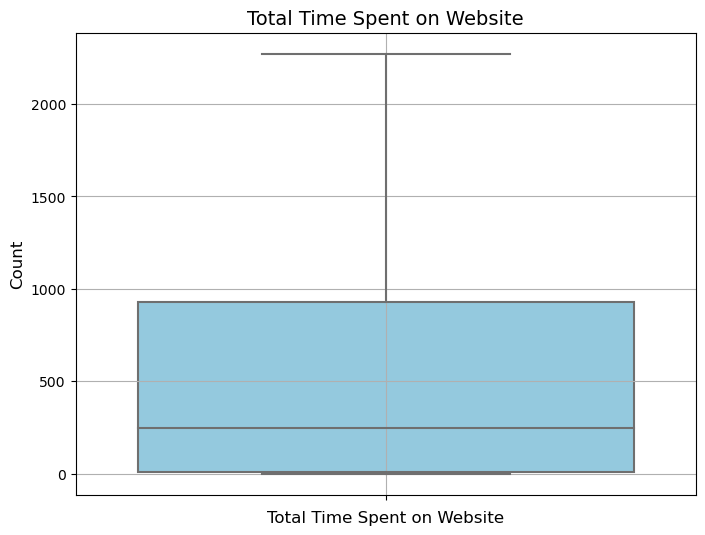

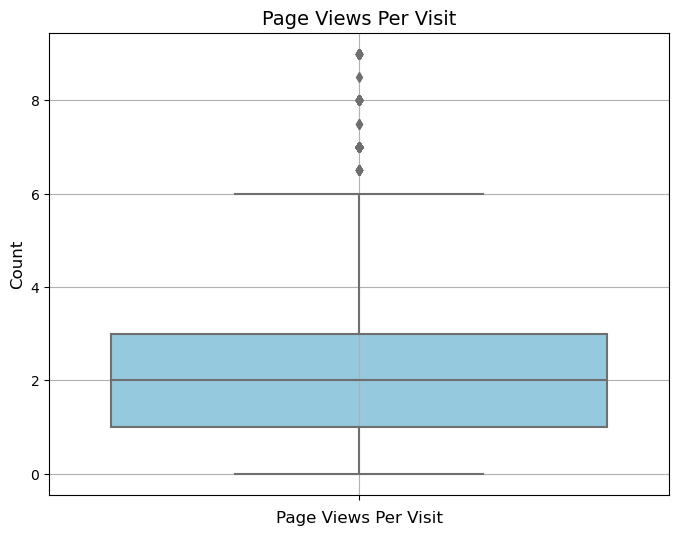

In [43]:
## Checking the distribution of values in the 'TotalVisits', 'Page Views Per Visit' columns after outlier removal.

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=column, data=df, color='skyblue')  
    plt.title(f'{column}', fontsize=14)  
    plt.xlabel(column, fontsize=12)  
    plt.ylabel('Count', fontsize=12)  
    plt.xticks(rotation=45) 
    plt.grid(True)  


The outliers have been successfully treated, and adjustments have been made to the upper limit accordingly.

## Bivariate Analysis

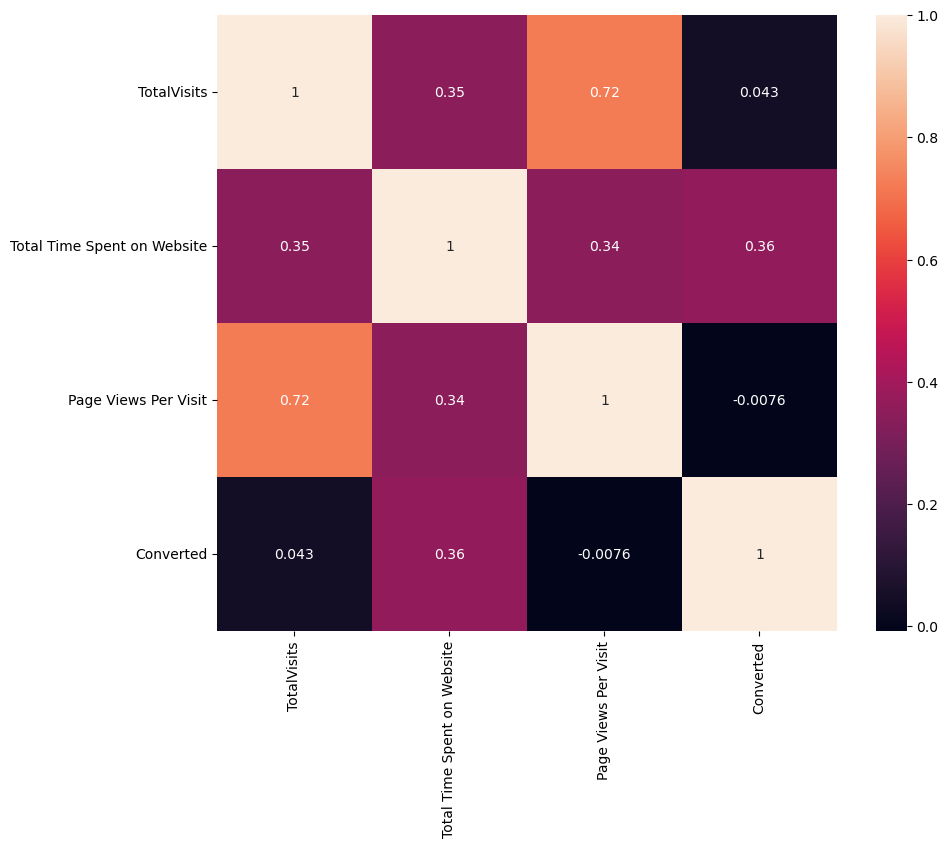

In [44]:
## Heatmap to check the correlation between the variables.

plt.figure(figsize=(10,8))
sns.heatmap(df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted']].corr(), annot=True)
plt.show()

The analysis reveals significant correlations between certain variables. Notably, 'TotalVisits' and 'Page Views per Visit' exhibit a strong correlation of 0.75, indicating that as the total number of visits increases, so does the average number of page views per visit. Additionally, 'Total Time Spent on Website' shows a moderate correlation of 0.36 with the target variable 'Converted'. This suggests that increased time spent on the website may have a positive impact on conversion rates, although the relationship is not as strong as the correlation observed between 'TotalVisits' and 'Page Views per Visit'.

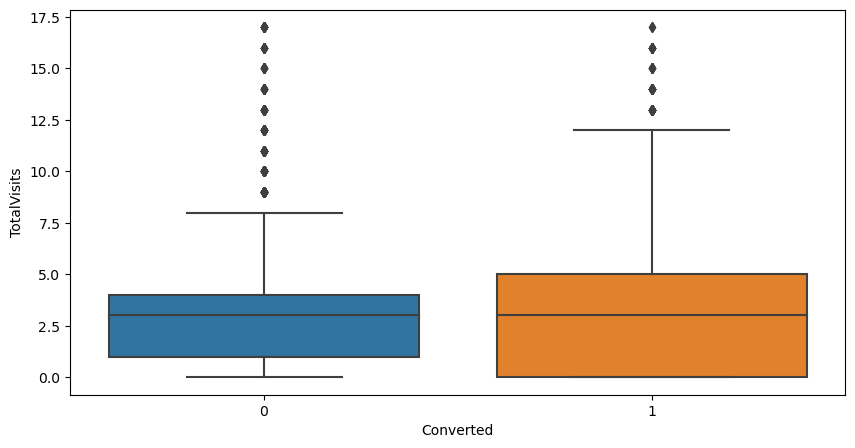

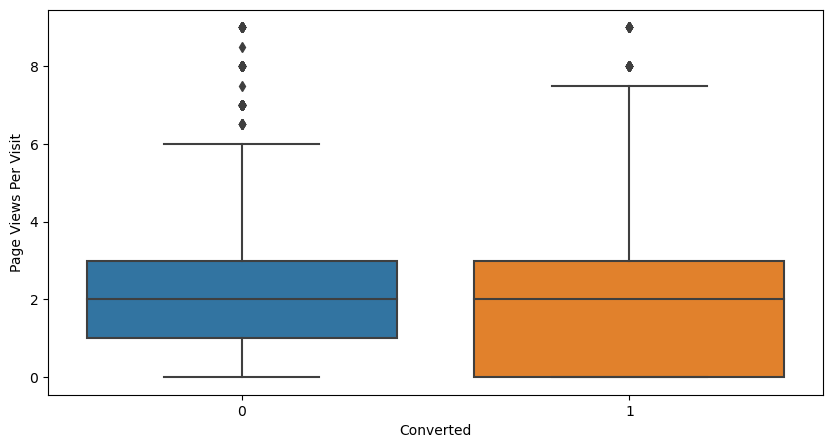

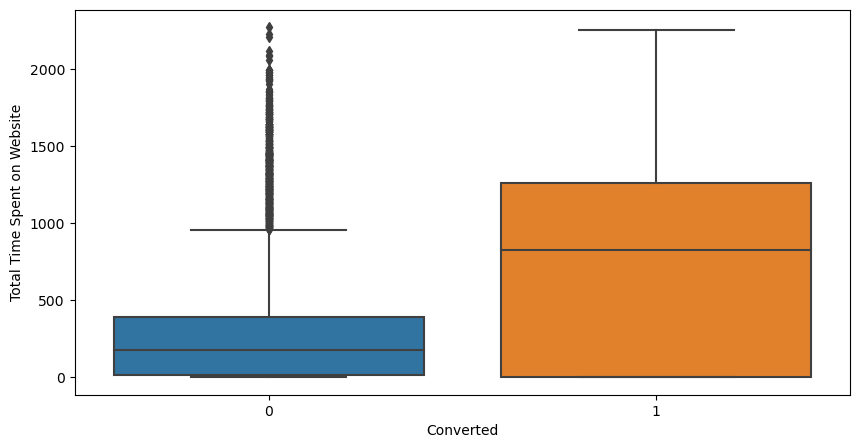

In [45]:
## Plotting boxplots to check the distribution of 'Converted' column for 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website'.

plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='TotalVisits', data=df)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Page Views Per Visit', data=df)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=df)
plt.show()


Leads who spend more time on the website tend to have a higher likelihood of opting for courses or getting converted. However, from the plot, we observe that the median time spent on the website for both converted and non-converted leads is approximately the same.

## Step 4: Data Preparation

In [46]:
## Converting the 'Do Not Email' and 'A free copy of Mastering The Interview' columns into numeric variables.

df['Do Not Email'] = df['Do Not Email'].map({'No': 0, 'Yes': 1})
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'No': 0, 'Yes': 1})


In [47]:
## Converting the categorical columns to dummies.

cat_cols = df.select_dtypes(include=['object']).columns
dummies = pd.get_dummies(df[cat_cols], drop_first=True, dtype='int')
dummies.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [48]:
## Dropping the original categorical columns.

df.drop(cat_cols, axis=1, inplace=True)

In [49]:
## Concatenating the dummies dataframe with the original dataframe.

df = pd.concat([df, dummies], axis=1)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [50]:
## Reviewing the dataset again

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9090 non-null   int64  
 1   Converted                                             9090 non-null   int64  
 2   TotalVisits                                           9090 non-null   float64
 3   Total Time Spent on Website                           9090 non-null   int64  
 4   Page Views Per Visit                                  9090 non-null   float64
 5   A free copy of Mastering The Interview                9090 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9090 non-null   int32  
 7   Lead Origin_Lead Add Form                             9090 non-null   int32  
 8   Lead Origin_Lead Import                               9090 non-

In [51]:
## Splitting the dataset into X and y

X = df.drop('Converted', axis=1)
y = df['Converted']

In [52]:
## Splitting the dataset into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
## Checking the shape of the train and test sets.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6363, 67)
(2727, 67)
(6363,)
(2727,)


In [54]:
## Scaling the numerical variables

scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

## Step 7 : Model Building

In [55]:
## Running RFE with 15 variables as output

lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [56]:
## Listing the top 15 variables

list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('Do Not Email', True, 1),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 30),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Origin_Quick Add Form', False, 33),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Social Media', False, 19),
 ('Lead Source_WeLearn', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 50),
 ('Lead Source_blog', Fals

In [57]:
## Storing the top 15 variables.

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Not Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [58]:
## Columns not selected by RFE

X_train.columns[~rfe.support_]


Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last

### Model 1

In [59]:
## Fitting the model 1

X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe) # Adding constant

log1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
log1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.9
Date:                Mon, 15 Apr 2024   Deviance:                       5173.7
Time:                        02:01:55   Pearson chi2:                 6.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4064
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2793      0.125     -2.240      0.025      -0.524      -0.035
Do Not Email                                            -1.2650      0.203     -6.225      0.000      -1.663      -0.867
Total Time Spent on Website                              1.1066      0.041     27.209      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -0.8664      0.128     -6.795      0.000      -1.116      -0.616
Lead Origin_Lead Add Form                                2.8461      0.206     13.815      0.000       2.442       3.250
Lead Source_Olark Chat                                   1.2003      0.123      9.748      0.000       0.959       1.442
Lead Source_Welingak Website                             2.4869      0.749      3.319      0.001       1.018       3.955
Last Activity_Converted to Lead                         -1.0592      0.211     -5.027      0.000      -1.472      -0.646
Last Activity_Email Bounced                             -0.7592      0.347     -2.187      0.029      -1.440      -0.079
Last Activity_Olark Chat Conversation                   -1.4649      0.170     -8.594      0.000      -1.799      -1.131
Last Activity_SMS Sent                                   1.2704      0.077     16.584      0.000       1.120       1.421
Last Activity_Unsubscribed                               0.9975      0.511      1.954      0.051      -0.003       1.998
Specialization_Not Specified                            -0.7763      0.122     -6.376      0.000      -1.015      -0.538
What is your current occupation_Housewife               22.7806   1.51e+04      0.002      0.999   -2.96e+04    2.96e+04
What is your current occupation_Other                   -1.1726      0.088    -13.296      0.000      -1.345      -1.000
What is your current occupation_Working Professional     2.1802      0.182     11.999      0.000       1.824       2.536
========================================================================================================================
"""

In [60]:
## Creating function to calculate VIF.

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [61]:
## Calculating VIF.

calculate_vif(X_train_rfe)

,Features,VIF
11,Specialization_Not Specified,2.32
0,Do Not Email,2.15
4,Lead Source_Olark Chat,2.07
7,Last Activity_Email Bounced,1.97
2,Lead Origin_Landing Page Submission,1.70
9,Last Activity_SMS Sent,1.60
13,What is your current occupation_Other,1.60
3,Lead Origin_Lead Add Form,1.49
8,Last Activity_Olark Chat Conversation,1.49
5,Lead Source_Welingak Website,1.30


In [62]:
## Removing 'What is your current occupation_Housewife' from the model

X_train_rfe = X_train_rfe.drop(['What is your current occupation_Housewife'], axis = 1)

### Model 2

In [63]:
## Fitting the model 2.

X_train_sm2 = sm.add_constant(X_train_rfe) # Adding constant
log3 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()
log3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.9
Date:                Mon, 15 Apr 2024   Deviance:                       5183.7
Time:                        02:02:00   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4054
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2722      0.125     -2.186      0.029      -0.516      -0.028
Do Not Email                                            -1.2670      0.203     -6.237      0.000      -1.665      -0.869
Total Time Spent on Website                              1.1058      0.041     27.221      0.000       1.026       1.185
Lead Origin_Landing Page Submission                     -0.8642      0.127     -6.786      0.000      -1.114      -0.615
Lead Origin_Lead Add Form                                2.8492      0.206     13.840      0.000       2.446       3.253
Lead Source_Olark Chat                                   1.1986      0.123      9.738      0.000       0.957       1.440
Lead Source_Welingak Website                             2.4820      0.749      3.313      0.001       1.014       3.951
Last Activity_Converted to Lead                         -1.0655      0.211     -5.059      0.000      -1.478      -0.653
Last Activity_Email Bounced                             -0.7634      0.347     -2.199      0.028      -1.444      -0.083
Last Activity_Olark Chat Conversation                   -1.4679      0.170     -8.613      0.000      -1.802      -1.134
Last Activity_SMS Sent                                   1.2641      0.077     16.516      0.000       1.114       1.414
Last Activity_Unsubscribed                               0.9929      0.511      1.945      0.052      -0.008       1.993
Specialization_Not Specified                            -0.7792      0.122     -6.404      0.000      -1.018      -0.541
What is your current occupation_Other                   -1.1759      0.088    -13.339      0.000      -1.349      -1.003
What is your current occupation_Working Professional     2.1744      0.182     11.970      0.000       1.818       2.530
========================================================================================================================
"""

In [64]:
## Calculating VIF.

calculate_vif(X_train_rfe)

,Features,VIF
11,Specialization_Not Specified,2.32
0,Do Not Email,2.15
4,Lead Source_Olark Chat,2.07
7,Last Activity_Email Bounced,1.97
2,Lead Origin_Landing Page Submission,1.69
9,Last Activity_SMS Sent,1.60
12,What is your current occupation_Other,1.60
8,Last Activity_Olark Chat Conversation,1.49
3,Lead Origin_Lead Add Form,1.48
5,Lead Source_Welingak Website,1.30


In [65]:
## Removing 'Last Activity_Unsubscribed' from the model

X_train_rfe = X_train_rfe.drop(['Last Activity_Unsubscribed'], axis = 1)

In [66]:
## Fitting the model 3.

X_train_sm3 = sm.add_constant(X_train_rfe) # Adding constant
log3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()
log3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.6
Date:                Mon, 15 Apr 2024   Deviance:                       5187.2
Time:                        02:02:02   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4051
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2675      0.125     -2.148      0.032      -0.512      -0.023
Do Not Email                                            -1.1405      0.190     -6.013      0.000      -1.512      -0.769
Total Time Spent on Website                              1.1063      0.041     27.236      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -0.8635      0.127     -6.779      0.000      -1.113      -0.614
Lead Origin_Lead Add Form                                2.8456      0.206     13.820      0.000       2.442       3.249
Lead Source_Olark Chat                                   1.1983      0.123      9.740      0.000       0.957       1.439
Lead Source_Welingak Website                             2.4689      0.749      3.296      0.001       1.001       3.937
Last Activity_Converted to Lead                         -1.0720      0.211     -5.090      0.000      -1.485      -0.659
Last Activity_Email Bounced                             -0.8790      0.340     -2.581      0.010      -1.546      -0.212
Last Activity_Olark Chat Conversation                   -1.4758      0.170     -8.664      0.000      -1.810      -1.142
Last Activity_SMS Sent                                   1.2500      0.076     16.427      0.000       1.101       1.399
Specialization_Not Specified                            -0.7779      0.122     -6.395      0.000      -1.016      -0.539
What is your current occupation_Other                   -1.1740      0.088    -13.326      0.000      -1.347      -1.001
What is your current occupation_Working Professional     2.1765      0.181     11.996      0.000       1.821       2.532
========================================================================================================================
"""

In [67]:
## Calculating VIF.

calculate_vif(X_train_rfe)

,Features,VIF
10,Specialization_Not Specified,2.32
4,Lead Source_Olark Chat,2.07
0,Do Not Email,1.90
7,Last Activity_Email Bounced,1.85
2,Lead Origin_Landing Page Submission,1.69
11,What is your current occupation_Other,1.60
9,Last Activity_SMS Sent,1.58
8,Last Activity_Olark Chat Conversation,1.49
3,Lead Origin_Lead Add Form,1.48
5,Lead Source_Welingak Website,1.30


## Observations

Based on the results from model 'log3', it's evident that the p-values of the variables are statistically significant, and the VIF values are below 3. Therefore, there is no need to drop any more variables, and we can proceed with making predictions using this model. We can consider model 'log3' as the final model, with model 'log1' serving as a baseline.

In [68]:
## Predicting on the train set.

y_train_pred = log3.predict(X_train_sm3)
                            
y_train_pred[:10]

2401    0.132197
6293    0.304823
1393    0.984527
301     0.286234
7211    0.996136
8739    0.188800
1536    0.945364
8343    0.941839
6156    0.983204
1664    0.186353
dtype: float64

In [69]:
## Reshaping the y_train_pred variable.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13219663, 0.3048226 , 0.98452725, 0.28623427, 0.99613593,
       0.1888002 , 0.94536386, 0.94183914, 0.98320448, 0.18635261])

In [70]:
## Creating a dataframe with actual and predicted values.

y_train_pred_final = pd.DataFrame({'actual':y_train.values, 'predicted':y_train_pred})

y_train_pred_final['Prospect ID'] = y_train.index  # Adding column 'Prospect ID' for indexing.

y_train_pred_final.head()

,actual,predicted,Prospect ID
0,0,0.132197,2401
1,0,0.304823,6293
2,1,0.984527,1393
3,1,0.286234,301
4,1,0.996136,7211


In [71]:
## Calculating the lead conversion rate for the train set.

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.predicted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,actual,predicted,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.132197,2401,1,1,0,0,0,0,0,0,0,0
1,0,0.304823,6293,1,1,1,1,0,0,0,0,0,0
2,1,0.984527,1393,1,1,1,1,1,1,1,1,1,1
3,1,0.286234,301,1,1,1,0,0,0,0,0,0,0
4,1,0.996136,7211,1,1,1,1,1,1,1,1,1,1


In [72]:
## Calculating accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # True Positive 
# TN = confusion[0,0] # True Negatives
# FP = confusion[0,1] # False Positives
# FN = confusion[1,0] # False Negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.actual, y_train_pred_final[i] )
    total1=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total1
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.386767     1.000000     0.000000
0.1          0.1  0.618419     0.982121     0.389031
0.2          0.2  0.763319     0.924421     0.661712
0.3          0.3  0.790665     0.880536     0.733983
0.4          0.4  0.812353     0.779358     0.833162
0.5          0.5  0.812196     0.699716     0.883137
0.6          0.6  0.804966     0.636733     0.911071
0.7          0.7  0.780921     0.522552     0.943875
0.8          0.8  0.757190     0.426249     0.965915
0.9          0.9  0.707842     0.262089     0.988980


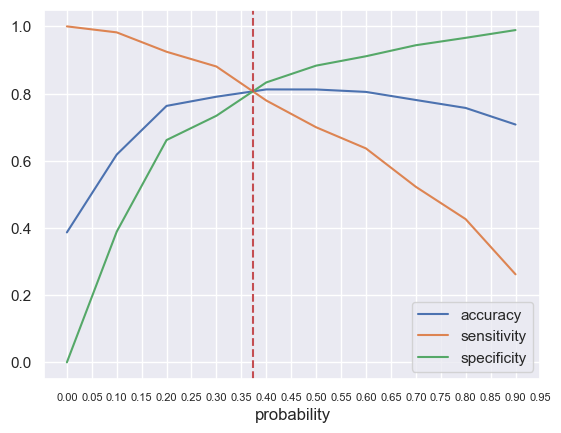

In [73]:
## Plotting accuracy, sensitivity and specificity for various probabilities:-

# Setting the style
sns.set(style='darkgrid')

#plt.figure(figsize=(20,5))
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.374, color='r', linestyle='--') # additing axline

plt.show()

In [74]:
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.374 cutoff point:-

y_train_pred_final['final_predicted'] = y_train_pred_final.predicted.map( lambda x: 1 if x > 0.374 else 0)
y_train_pred_final.head()

,actual,predicted,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.132197,2401,1,1,0,0,0,0,0,0,0,0,0
1,0,0.304823,6293,1,1,1,1,0,0,0,0,0,0,0
2,1,0.984527,1393,1,1,1,1,1,1,1,1,1,1,1
3,1,0.286234,301,1,1,1,0,0,0,0,0,0,0,0
4,1,0.996136,7211,1,1,1,1,1,1,1,1,1,1,1


In [75]:
## Dropping the unnecessary columns from the dataframe.

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 


In [76]:
## Showing the initial few rows.

y_train_pred_final.head()


,actual,predicted,Prospect ID,final_predicted
0,0,0.132197,2401,0
1,0,0.304823,6293,0
2,1,0.984527,1393,1
3,1,0.286234,301,0
4,1,0.996136,7211,1


In [77]:
## Assigning the 'Lead_Score' based on 'predicted'.

y_train_pred_final['Lead_Score'] = y_train_pred_final.predicted.map( lambda x: round(x*100))

## Step: 8 Model Evaluation

In [78]:
## Creating confusion matrix:

confusion = metrics.confusion_matrix(y_train_pred_final.actual, y_train_pred_final.final_predicted)
print(confusion)

[[3195  707]
 [ 510 1951]]


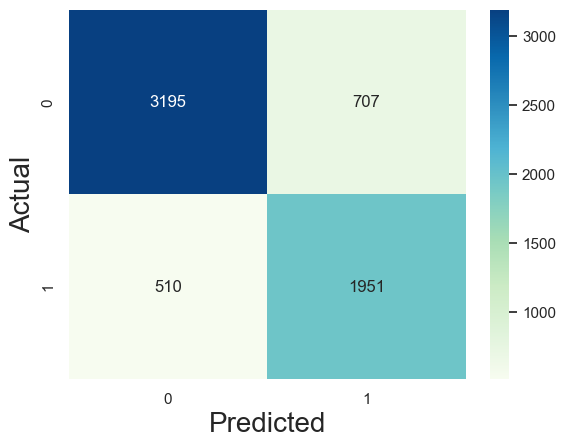

In [79]:
## Plotting confusion matrix

# Plotting confusion matrix:-
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [80]:
## Calculating accuracy.

metrics.accuracy_score(y_train_pred_final.actual, y_train_pred_final.final_predicted)



0.8087380166588087

In [81]:
## Calculating TP, TN, FP, FN

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
## Calculating sensitivity and specificity.


sensitivity =TP / float(TP+FN)
print(sensitivity)

specificity = TN / float(TN+FP)
print(specificity)

0.7927671678179602
0.81881086622245


In [83]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-
print(FP/ float(TN+FP))

## Calculate positive predictive value :-
print (TP / float(TP+FP))

## Calculate Negative predictive value:-
print (TN / float(TN+ FN))

0.18118913377754997
0.7340105342362678
0.8623481781376519


### Precision and Recall

In [84]:
## Calculating precision and recall.

print('Precision Score: ', precision_score(y_train_pred_final.actual, y_train_pred_final.final_predicted))
print('Recall Score: ', recall_score(y_train_pred_final.actual, y_train_pred_final.final_predicted))



Precision Score:  0.7340105342362678
Recall Score:  0.7927671678179602


In [85]:
##  creating a function to plot ROC curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
## Calculating ROC curve

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.actual, y_train_pred_final.predicted, drop_intermediate = False )

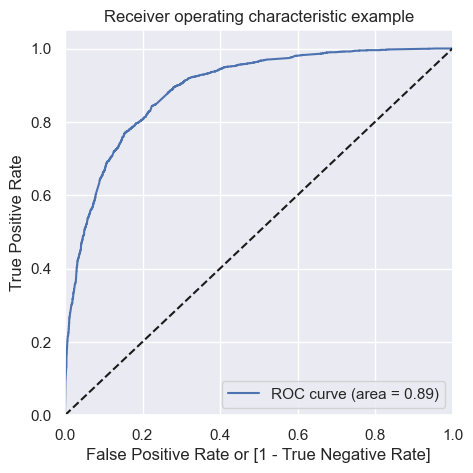

In [87]:
## Plotting ROC curve
draw_roc(y_train_pred_final.actual, y_train_pred_final.predicted)

The observation indicates that we have achieved a high value of 0.89 for the ROC Curve, suggesting a strong predictive model. This value is close to 1, as expected, indicating the effectiveness of the model in distinguishing between the positive and negative classes.

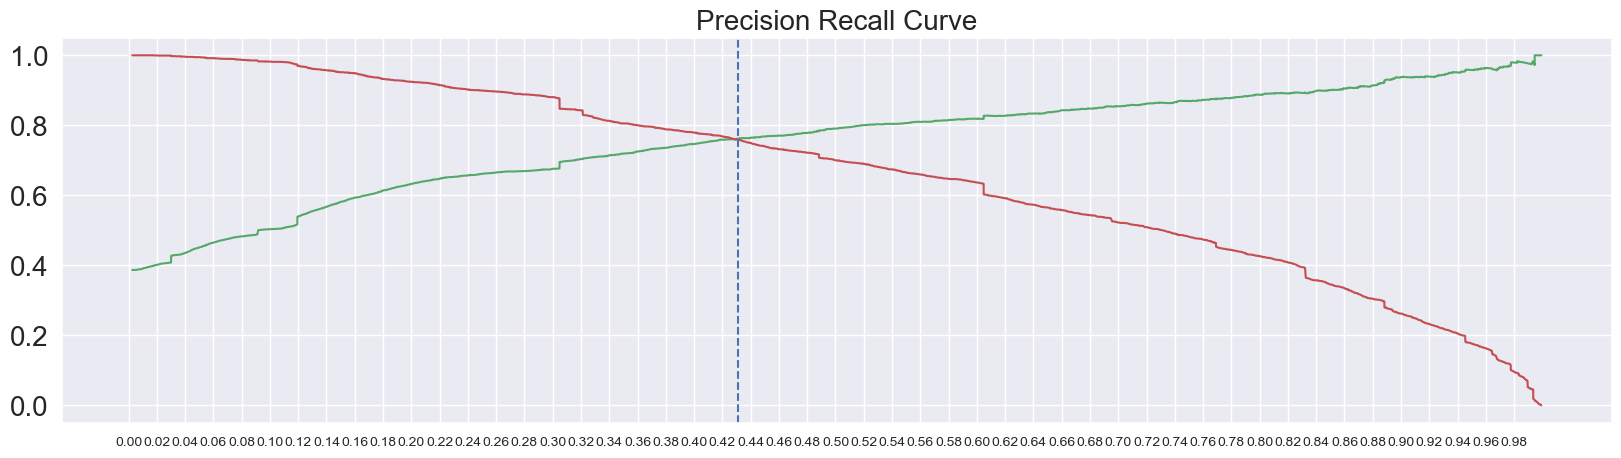

In [88]:
## Balancing Precision and Recall

p, r, thresholds = precision_recall_curve(y_train_pred_final.actual, y_train_pred_final.predicted)

plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.431, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

### Observation
In the precision-recall curve above, we can identify a cutoff point at approximately 0.431.

In [89]:
## Plotting the training dataset again with a cutoff of 0.431:

y_train_pred_final['final_predicted_2'] = y_train_pred_final['predicted'].map( lambda x: 1 if x > 0.431 else 0)
y_train_pred_final.head()

,actual,predicted,Prospect ID,final_predicted,Lead_Score,final_predicted_2
0,0,0.132197,2401,0,13,0
1,0,0.304823,6293,0,30,0
2,1,0.984527,1393,1,98,1
3,1,0.286234,301,0,29,0
4,1,0.996136,7211,1,100,1


In [90]:
## Calculating confusion matrix again.

confusion_2 = metrics.confusion_matrix(y_train_pred_final.actual, y_train_pred_final.final_predicted_2)
print(confusion_2)

[[3318  584]
 [ 594 1867]]


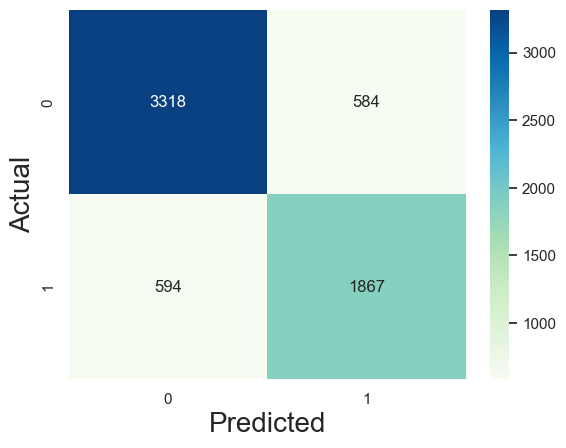

In [91]:
## Plotting confusion matrix

sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [92]:
## Calculating accuracy

metrics.accuracy_score(y_train_pred_final.actual, y_train_pred_final.final_predicted_2)

0.8148672010058149

In [93]:
## Calculating TP, TN, FP, FN.

TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [94]:
## Calculating sensitivity and specificity.


sensitivity =TP / float(TP+FN)
print( 'sensitivity: ',sensitivity)

specificity = TN / float(TN+FP)
print('specificity: ',specificity)

sensitivity:  0.7586347013409184
specificity:  0.8503331624807791


In [95]:
## Calculate positive predictive value :-
print (TP / float(TP+FP))

## Calculate Negative predictive value:-
print (TN / float(TN+ FN))

0.7617299061607508
0.848159509202454


In [96]:
## Calculating precision and recall.

print('Precision Score: ', precision_score(y_train_pred_final.actual, y_train_pred_final.final_predicted_2))
print('Recall Score: ', recall_score(y_train_pred_final.actual, y_train_pred_final.final_predicted_2))

Precision Score:  0.7617299061607508
Recall Score:  0.7586347013409184


### Observation
Upon utilizing the Precision-Recall trade-off curve, we observed a decrease in the number of True Positives and an increase in the number of True Negatives. Consequently, we cannot rely on the Precision-Recall trade-off method alone as it reduces the True Positive count, leading to a decrease in 'Recall' or 'Sensitivity' for this particular point. To enhance the True Positives, we need to increase the Sensitivity or Recall value. Thus, we will opt for 0.374 as the optimal cutoff point.


## Step 9 :Making predictions on the Test data.



In [97]:
# # Predicting using the parameters of the final model (log3)

test_col = X_train_sm3.columns.drop('const')

X_test=X_test[test_col]
X_test = sm.add_constant(X_test) # Adding constant

y_test_pred = log3.predict(X_test)
y_test_pred[:10]


3343    0.304823
2600    0.831928
3115    0.077615
1348    0.030054
4525    0.928029
461     0.054922
1079    0.930290
7339    0.030054
6291    0.131763
1672    0.084744
dtype: float64

In [98]:
# Converting y_test_pred to a dataframe :-

y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)


In [99]:
# Setting 'Prospect ID' as the index:


y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side :-

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1:-

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,1,3343,0.304823
1,1,2600,0.831928
2,0,3115,0.077615
3,0,1348,0.030054
4,1,4525,0.928029


In [100]:
# Renaming the column '0' as 'Converted_Prob':-

y_pred_final= y_pred_final.rename(columns={ 0 : 'predicted'})

# Rearranging the columns:-
y_pred_final = y_pred_final[['Prospect ID','Converted','predicted']]
y_pred_final.head()

,Prospect ID,Converted,predicted
0,3343,1,0.304823
1,2600,1,0.831928
2,3115,0,0.077615
3,1348,0,0.030054
4,4525,1,0.928029


In [101]:
## Assigning the 'Lead Score' to the dataframe 'y_pred_final'.

y_pred_final['Lead_Score'] = y_pred_final.predicted.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,predicted,Lead_Score
0,3343,1,0.304823,30
1,2600,1,0.831928,83
2,3115,0,0.077615,8
3,1348,0,0.030054,3
4,4525,1,0.928029,93


In [102]:
# Calculating 'final_Predicted' based on 'Predicted' for cutoff point 0.374:-

y_pred_final['final_Predicted'] = y_pred_final.predicted.map(lambda x: 1 if x > 0.374 else 0)
y_pred_final.head()

,Prospect ID,Converted,predicted,Lead_Score,final_Predicted
0,3343,1,0.304823,30,0
1,2600,1,0.831928,83,1
2,3115,0,0.077615,8,0
3,1348,0,0.030054,3,0
4,4525,1,0.928029,93,1


### Test model Evaluation

In [103]:
## Calculating the accuracy of the model.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.817015034836817

In [104]:
## Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1397,  296],
       [ 203,  831]], dtype=int64)

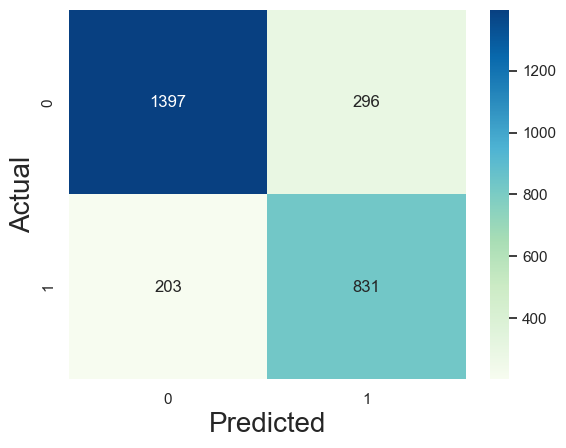

In [105]:
## Plotting confusion matrix
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [106]:
## Calculating TP, TN, FP, FN

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
## Calculating sensitivity and specificity.


sensitivity =TP / float(TP+FN)
print( 'sensitivity: ',sensitivity)

specificity = TN / float(TN+FP)
print('specificity: ',specificity)

sensitivity:  0.8036750483558994
specificity:  0.8251624335499114


In [108]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-
print(FP/ float(TN+FP))

## Calculate positive predictive value :-
print (TP / float(TP+FP))

## Calculate Negative predictive value:-
print (TN / float(TN+ FN))

0.1748375664500886
0.7373558118899733
0.873125


In [109]:
## Calculating precision and recall.

print('Precision Score: ', precision_score(y_pred_final.Converted, y_pred_final.final_Predicted))
print('Recall Score: ', recall_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Precision Score:  0.7373558118899733
Recall Score:  0.8036750483558994


### Observation

The sensitivity for the test dataset is around 80%, similar to the one observed in the training dataset. Likewise, the accuracy stands at approximately 80%. These results indicate that the model performs well on the test dataset too.

# Overall Recommendation

To improve the potential lead conversion rate, X-Education should focus on important features that significantly influence conversion rates:

- Lead Source_Welingak Website: The conversion rate is higher for leads originating from the 'Welingak Website'. Thus, the company should concentrate on optimizing this website to attract more potential leads.

- Lead Origin_Lead Add Form: Leads generated through the 'Lead Add Form' exhibit a higher conversion rate. Therefore, X-Education should prioritize strategies to capture more leads through this channel.

- What is your current occupation_Working Professional: Leads identified as 'Working Professionals' have a higher likelihood of conversion. X-Education should target this demographic to increase the number of potential leads.

- Last Activity_SMS Sent: Leads with the last activity recorded as SMS Sent tend to have a higher conversion rate. The company should emphasize SMS marketing to engage potential leads effectively.

- Total Time Spent on Website: Leads spending more time on the website demonstrate a higher propensity to convert. Hence, X-Education should focus on improving website engagement to attract and retain potential leads.